In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Pulpit\MyProjects\Machine Learning\housing_prediction\melb_data.csv')

In [2]:
cat_cols=[]
num_cols=[]
data.columns
for col in data.columns:
    if data[col].dtype=='object':
        cat_cols.append(col)
    else:
        num_cols.append(col)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16264\2328605935.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


<AxesSubplot: xlabel='Longtitude', ylabel='Lattitude'>

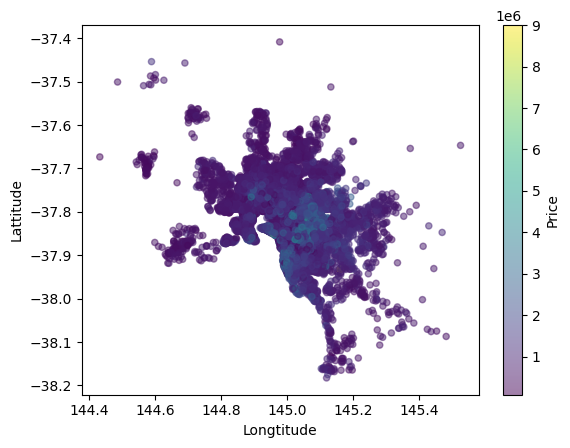

In [3]:
cat_cols
data.corr()
#plt.scatter(x=data['Longtitude'], y=data['Lattitude'],c='alpha=0.1)
data.plot(kind='scatter', x='Longtitude', y='Lattitude', c='Price', alpha=0.5, cmap=plt.get_cmap('jet'), colorbar=True)


In [4]:
data.corr()['Price'].sort_values()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16264\90096721.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price'].sort_values()


YearBuilt       -0.323617
Lattitude       -0.212934
Distance        -0.162522
Propertycount   -0.042153
Landsize         0.037507
BuildingArea     0.090981
Postcode         0.107867
Longtitude       0.203656
Car              0.238979
Bathroom         0.467038
Bedroom2         0.475951
Rooms            0.496634
Price            1.000000
Name: Price, dtype: float64

In [5]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
median = data['Car'].median()
data['Car'].fillna(median, inplace=True)

In [7]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
num_data = data[num_cols]
cat_data = data[cat_cols]

In [9]:
num_data.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [10]:
imputer.fit(num_data)

SimpleImputer()

In [11]:
#while trying to fill in BuildingArea we might want to use Rooms feature 

In [12]:
X = imputer.transform(num_data)

In [13]:
num_data_tr = pd.DataFrame(X, columns=num_data.columns, index=num_data.index)

In [14]:
cat_data = cat_data.drop(['CouncilArea'], axis=1)

In [15]:
cat_data.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [16]:
cat_data.dtypes

Suburb        object
Address       object
Type          object
Method        object
SellerG       object
Date          object
Regionname    object
dtype: object

In [17]:
from sklearn.preprocessing import OrdinalEncoder

In [18]:
ordinal = OrdinalEncoder()
cat_data_ord = ordinal.fit_transform(cat_data)
ordinal.categories_

[array(['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale',
        'Albert Park', 'Albion', 'Alphington', 'Altona', 'Altona Meadows',
        'Altona North', 'Ardeer', 'Armadale', 'Ascot Vale', 'Ashburton',
        'Ashwood', 'Aspendale', 'Aspendale Gardens', 'Attwood',
        'Avondale Heights', 'Bacchus Marsh', 'Balaclava', 'Balwyn',
        'Balwyn North', 'Bayswater', 'Bayswater North', 'Beaconsfield',
        'Beaconsfield Upper', 'Beaumaris', 'Bellfield', 'Bentleigh',
        'Bentleigh East', 'Berwick', 'Black Rock', 'Blackburn',
        'Blackburn North', 'Blackburn South', 'Bonbeach', 'Boronia',
        'Box Hill', 'Braybrook', 'Briar Hill', 'Brighton', 'Brighton East',
        'Broadmeadows', 'Brookfield', 'Brooklyn', 'Brunswick',
        'Brunswick East', 'Brunswick West', 'Bulleen', 'Bullengarook',
        'Bundoora', 'Burnley', 'Burnside', 'Burnside Heights', 'Burwood',
        'Burwood East', 'Cairnlea', 'Camberwell', 'Campbellfield',
        'Canterbury', 'Carlton

In [19]:
cat_data_tr = pd.DataFrame(cat_data_ord, columns = cat_data.columns, index=cat_data.index)

In [20]:
cat_data_tr = cat_data_tr

In [21]:
all_data = pd.concat([cat_data_tr,num_data_tr], axis=1)

In [22]:
all_data

,Suburb,Address,Type,Method,SellerG,Date,Regionname,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,0.0,12794.0,0.0,1.0,23.0,45.0,2.0,2.0,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.79960,144.99840,4019.0
1,0.0,5943.0,0.0,1.0,23.0,47.0,2.0,2.0,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.80790,144.99340,4019.0
2,0.0,9814.0,0.0,3.0,23.0,48.0,2.0,3.0,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.80930,144.99440,4019.0
3,0.0,9004.0,0.0,0.0,23.0,48.0,2.0,3.0,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.79690,144.99690,4019.0
4,0.0,10589.0,0.0,4.0,155.0,49.0,2.0,4.0,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,302.0,1991.0,0.0,1.0,16.0,33.0,4.0,4.0,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,-37.90562,145.16761,7392.0
13576,305.0,12234.0,0.0,3.0,251.0,33.0,6.0,3.0,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,-37.85927,144.87904,6380.0
13577,305.0,12745.0,0.0,1.0,194.0,33.0,6.0,3.0,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.000000,-37.85274,144.88738,6380.0
13578,305.0,13311.0,0.0,0.0,222.0,33.0,6.0,4.0,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.00000,1920.000000,-37.85908,144.89299,6380.0


In [23]:
y = all_data['Price']
X = all_data.drop(['Price'], axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
y = forest_model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error

mse_forest = mean_squared_error(y_test, y)

In [28]:
mse_forest_sqrt = np.sqrt(mse_forest)
mse_forest_sqrt

295838.337478037

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_model, X_test, y_test, scoring='neg_mean_squared_error', cv=3)


In [30]:
forest_scores = np.sqrt(-scores)

In [31]:
forest_scores

array([298915.47267032, 293660.33770996, 346843.5638926 ])

In [33]:
def score_model(model, X, y):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=3)
    scores_ret = np.sqrt(-scores)
    return scores_ret

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('std_scaler', StandardScaler())])
data_tr = num_pipeline.fit_transform(X_train)

In [39]:
data_tr
X_train_tr = pd.DataFrame(data_tr, columns=X_train.columns, index=X_train.index)
data2_tr = num_pipeline.fit_transform(X_test)
X_test_tr = pd.DataFrame(data2_tr, columns=X_test.columns, index=X_test.index)
X_test_tr

,Suburb,Address,Type,Method,SellerG,Date,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1061,-1.293835,-0.686737,-0.625617,-0.364167,-1.262132,1.338515,0.621515,0.059892,0.178591,0.946595,0.088283,0.676833,1.452668,-0.006280,0.078725,0.024540,-1.520481,-0.025903,0.709986
6482,1.581614,0.890803,1.781263,-0.364167,-0.317632,0.553110,-0.852363,-0.992806,-1.439627,-1.169221,-0.966879,-0.773939,-0.646593,-0.094689,-1.059788,1.243043,-0.022639,-0.417074,-1.189223
8395,1.204142,1.343979,1.781263,1.432418,0.116327,-0.353126,0.621515,0.059892,-0.708819,0.900348,0.088283,-0.773939,-1.696223,-0.094689,-0.531535,-1.108032,-0.807879,-0.175526,1.315303
4659,0.793363,1.512360,0.577823,2.330710,1.265042,-0.594789,-0.852363,0.059892,-0.047612,-0.695186,0.088283,0.676833,-0.646593,-0.072737,-0.680106,1.373658,1.153342,-0.587234,0.006171
7386,1.093120,-0.470283,-0.625617,1.432418,-0.572903,0.069784,1.112808,-0.992806,-0.186813,-1.030479,-0.966879,-0.773939,0.403037,-0.025225,0.078725,0.198120,-0.323209,-1.204308,-1.472660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,-1.737920,-1.528386,-0.625617,1.432418,-0.700538,0.432279,1.112808,-0.992806,-0.186813,-0.741433,-0.966879,-0.773939,0.403037,-0.094689,-0.729630,0.851197,0.592278,-0.923642,-1.345500
5863,1.204142,1.229645,-0.625617,-0.364167,1.507549,0.190616,0.621515,-0.992806,-0.708819,0.900348,-0.966879,-0.773939,-0.646593,-0.040411,-0.399471,-1.761109,-0.717708,-0.143254,1.315303
227,-1.626899,-0.094283,-0.625617,-0.364167,-0.470795,1.157268,0.621515,0.059892,-0.674018,0.449436,0.088283,-0.773939,-0.646593,-0.062062,-0.515027,-2.479493,-0.650079,0.230315,-0.596417
9609,0.149440,1.580700,-0.625617,-0.364167,0.052509,-0.776037,0.621515,0.059892,-0.500017,-0.024599,0.088283,0.676833,2.502298,0.007102,0.078725,0.024540,0.190265,0.548142,-1.088906


In [41]:
forest_model.fit(X_train_tr, y_train)
forest_model.predict(X_test_tr)

array([2247545.  ,  656883.78,  568302.5 , ..., 1911410.  , 1878295.  ,
        562698.  ])

In [42]:
score_model(forest_model, X_test_tr, y_test)

array([299043.28363695, 292968.23597572, 346894.37055329])

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.predict(X_test_tr)

score_model(lin_reg, X_test_tr, y_test)

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge.predict(X_test_tr)
score_model(ridge, X_test_tr, y_test)

array([393948.56668313, 385346.45191921, 439444.62770205])

In [ ]:
from sklearn.model_selection import GridSearchCV
